In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
path = r"/Users/shrinidhiparthasarathy/Desktop/Shrinidhi/indivi_proj/framingham.csv"
disease_df = pd.read_csv(path)
disease_df.drop(columns=['education'], inplace = True, axis = 1) #not a useful feature
disease_df.rename(columns ={'male':'Sex_male'}, inplace= True)

In [7]:
disease_df.dropna(axis = 0, inplace = True) #drop rows with missing value

In [8]:
disease_df

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4237,0,52,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0
4238,1,40,0,0.0,0.0,0,1,0,185.0,141.0,98.0,25.60,67.0,72.0,0


In [9]:
X = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]) 
y = np.asarray(disease_df['TenYearCHD']) #target
X = preprocessing.StandardScaler().fit(X).transform(X)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 4)


/var/folders/40/gqgn2dgx2jdbsj23x9ml8wz40000gn/T/ipykernel_4554/4266678475.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")


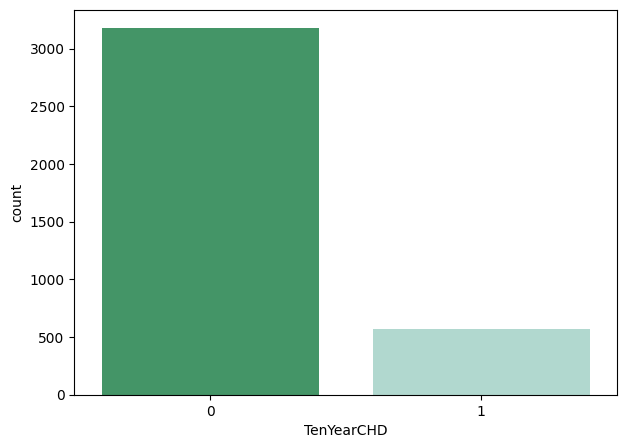

In [12]:
plt.figure(figsize=(7, 5))
sns.countplot(x='TenYearCHD', data=disease_df, palette="BuGn_r")
plt.show()

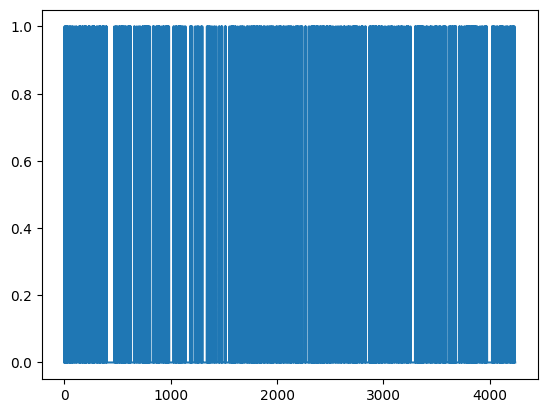

In [13]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

In [14]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model: ", accuracy_score(y_test, y_pred))

Accuracy of the model:  0.8490230905861457


Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.99      0.92       951
           1       0.61      0.08      0.14       175

    accuracy                           0.85      1126
   macro avg       0.73      0.54      0.53      1126
weighted avg       0.82      0.85      0.80      1126



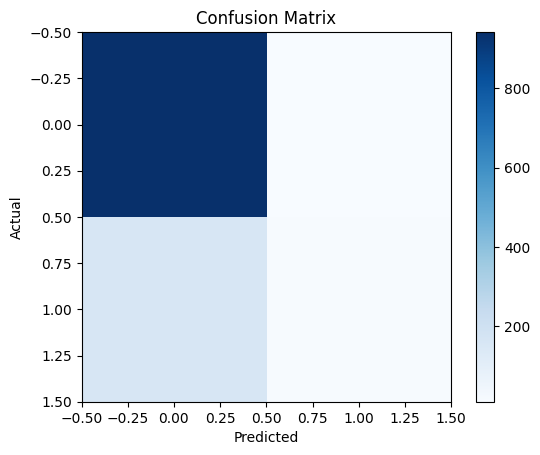

In [18]:
from sklearn.metrics import confusion_matrix, classification_report
print("Classification Report: ")
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure()
plt.imshow(cm, cmap='Blues')
plt.title("Confusion Matrix")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.colorbar()
plt.show()

In [2]:
!pip install lightgbm


[notice] A new release of pip is available: 25.3 -> 26.0.1
[notice] To update, run: pip install --upgrade pip


In [3]:
import lightgbm as lgb
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
path = r"/Users/shrinidhiparthasarathy/Desktop/Shrinidhi/indivi_proj/framingham.csv"
disease_df = pd.read_csv(path)
disease_df.drop(columns=['education'], inplace = True, axis = 1) #not a useful feature
disease_df.rename(columns ={'male':'Sex_male'}, inplace= True)

In [6]:
disease_df.dropna(axis = 0, inplace = True) #drop rows with missing value

In [7]:
X1 = np.asarray(disease_df[['age', 'Sex_male', 'cigsPerDay', 'totChol', 'sysBP', 'glucose']]) 
y1 = np.asarray(disease_df['TenYearCHD']) #target
scaler = preprocessing.StandardScaler().fit(X1)
X1 = scaler.transform(X1)

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

In [10]:
X1_train, X1_test, y1_train, y1_test = train_test_split( X1, y1, test_size=0.3, random_state=4)

In [11]:
model = lgb.LGBMClassifier(
    objective='binary',
    n_estimators=300,
    learning_rate=0.05,
    max_depth=5,
    random_state=42
)
model.fit(X1_train, y1_train)

[LightGBM] [Info] Number of positive: 397, number of negative: 2228
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 519
[LightGBM] [Info] Number of data points in the train set: 2625, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.151238 -> initscore=-1.724923
[LightGBM] [Info] Start training from score -1.724923
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,5
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [13]:
y1_pred = model.predict(X1_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


In [14]:
print ("Accuracy using LGBM: ",accuracy_score(y1_test, y1_pred))

Accuracy using LGBM:  0.8339253996447602


In [15]:
print("Classification Report: ")
print(classification_report(y1_test, y1_pred))

Classification Report: 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       951
           1       0.38      0.11      0.18       175

    accuracy                           0.83      1126
   macro avg       0.62      0.54      0.54      1126
weighted avg       0.78      0.83      0.79      1126



In [ ]:
cm = confusion_matrix(y1_test, y1_pred)
lgb.plot_importance(model)
plt.title("Feature Importance